In [1]:
from constructor import Constructor
from models import Data 

In [2]:
import tensorflow as tf
import numpy as np
import os 

In [3]:
Data = Data([1,1,1],30000,0.01)

In [4]:
Data.getData(150,128,num_predictions=300)

In [5]:
Data.x_train.shape

TensorShape([15360, 150, 3])

In [6]:
Data.batch_size

3840

In [9]:
model10 = Constructor(Data,16,1,256)
model10.fitModel()
model20 = Constructor(Data,32,10,128)
model20.fitModel()
model30 = Constructor(Data,64,10,128)
model30.fitModel()
model40 = Constructor(Data,128,10,128)
model40.fitModel()
model50 = Constructor(Data,256,10,128)
model50.fitModel()

60/60 [==============================] - 20s 306ms/step - loss: 0.8601 - accuracy: 0.2762 - val_loss: 0.3330 - val_accuracy: 0.4168

Epoch 00001: saving model to training_checkpoints/256BatchSize16LSTM_Neurons1Epochs.ckpt
Epoch 1/10
 72/120 [=================>............] - ETA: 12s - loss: 0.3845 - accuracy: 0.3965

KeyboardInterrupt: 

In [11]:
model11 = Constructor(Data,16,1,256,baseline=False)
# model21 = Constructor(Data,32,10,128,baseline=False)
# model31 = Constructor(Data,64,10,128,baseline=False)
# model41 = Constructor(Data,128,10,128,baseline=False)
# model51 = Constructor(Data,256,10,128,baseline=False)

In [12]:
model11.predict()
#model21.predict()

In [13]:
import matplotlib.pyplot as plt

NameError: name 'model21' is not defined

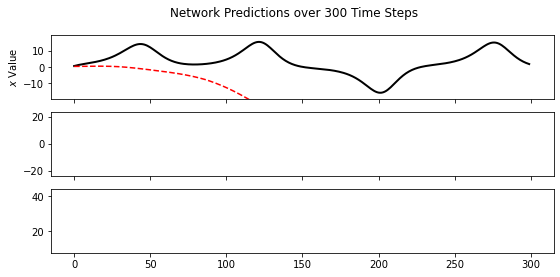

In [14]:
fig,axs = plt.subplots(3,figsize=(9,4), sharex=True)
fig.suptitle('Network Predictions over 300 Time Steps')

#  Set the axes limits for y (slightly above and below ranges for true predicted data)
#  Set axes limits for x (-15 to number of predictions +15)
for i,ax in enumerate(axs.flat):
    ax.set_ylim([min(Data.prediction_y_data[:,i])-4\
                 ,max(Data.prediction_y_data[:,i])+4])
    ax.set_xlim([-15,Data.num_predictions+15])

# Subplot 1: Predicted x data
axs[0]\
.plot(Data.prediction_y_data[:,0],'k-', label= "True Values", linewidth=2)
axs[0].set(ylabel='$x$ Value')
axs[0].plot(model11.pred_y_hat[:,0],'r--',label = "10 LSTM Units")
axs[0].plot(model21.pred_y_hat[:,0],'b--',label = "20 LSTM Units")

# Subplot 2: Predicted y data
axs[1]\
.plot(Data.prediction_y_data[:,1],'k-',label = "True Values", linewidth=2)
axs[1].set(ylabel='$y$ Value')
axs[1].plot(model11.pred_y_hat[:,1],'r--',label = "10 LSTM Units")
axs[1].plot(model21.pred_y_hat[:,1],'b--',label = "20 LSTM Units")

#Subplot 3 Predicted z data
axs[2]\
.plot(Data.prediction_y_data[:,2],'k-',label = "True Values", linewidth=2)
axs[2].set(ylabel='$z$ Value')
axs[2].plot(model11.pred_y_hat[:,2],'r--',label = "10 LSTM Units")
axs[2].plot(model21.pred_y_hat[:,2],'b--',label = "20 LSTM Units")

# Create 1 label for all x-axis labels 
for ax in axs.flat:
    ax.set(xlabel='Time Steps')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.legend(loc=(0,0), frameon=False, fontsize="x-small")
 
#plt.show() # might need to show the plots sometimes 

#Save plot to location
fig.savefig("plotstest/"+"test.png", bbox_inches='tight',transparent=True, dpi=1200)
# Completely close plots to prepare next plots 
plt.clf()
plt.cla()
plt.close()

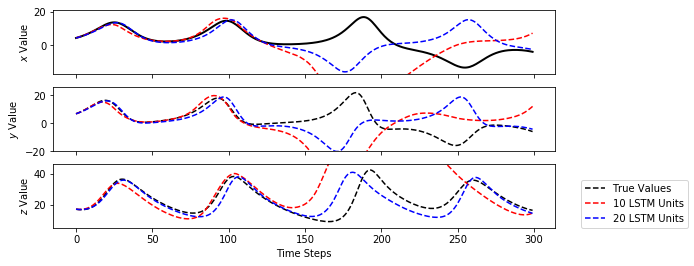

In [125]:
fig,axs = plt.subplots(3,figsize=(9,4), sharex=True)
for i,ax in enumerate(axs.flat):
    ax.set_ylim([min(Data.prediction_y_data[:,i])-4\
                 ,max(Data.prediction_y_data[:,i])+4])

l1 = axs[0]\
.plot(Data.prediction_y_data[:,0],'k-', label= "True Values", linewidth=2)
axs[0].set(ylabel='$x$ Value')
axs[0].plot(model11.pred_y_hat[:,0],'r--',label = "10 LSTM Units")
axs[0].plot(model21.pred_y_hat[:,0],'b--',label = "20 LSTM Units")
l2 = axs[1]\
.plot(Data.prediction_y_data[:,1],'k--',label = "True Values")
axs[1].set(ylabel='$y$ Value')
axs[1].plot(model11.pred_y_hat[:,1],'r--',label = "10 LSTM Units")
axs[1].plot(model21.pred_y_hat[:,1],'b--',label = "20 LSTM Units")
l3 = axs[2]\
.plot(Data.prediction_y_data[:,2],'k--',label = "True Values")
axs[2].set(ylabel='$z$ Value')
axs[2].plot(model11.pred_y_hat[:,2],'r--',label = "10 LSTM Units")
axs[2].plot(model21.pred_y_hat[:,2],'b--',label = "20 LSTM Units")

for ax in axs.flat:
    ax.set(xlabel='Time Steps')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.legend(loc=(1.05,0))
 
plt.show()
fig.savefig("plotstest/"+"test_no_title.png", bbox_inches='tight',transparent=True)
plt.clf()
plt.cla()
plt.close()

In [83]:
Data.prediction_y_data.shape

(300, 3)

In [109]:
for i,ax in enumerate(axs.flat):
    print(i,ax)

0 AxesSubplot(0.125,0.657941;0.775x0.222059)
1 AxesSubplot(0.125,0.391471;0.775x0.222059)
2 AxesSubplot(0.125,0.125;0.775x0.222059)
